In [4]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras 
'''from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout'''

'from keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Dropout'

In [5]:
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout

In [6]:
df = web.DataReader("ITUB4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,19.179064,18.468319,18.870523,18.639118,20756703.0,13.831242
2015-01-05,18.925619,18.203856,18.347107,18.732782,23532382.0,13.900749
2015-01-06,19.035812,18.528925,18.732782,19.035812,27725577.0,14.125619
2015-01-07,20.022038,19.283747,19.283747,19.724518,23601897.0,14.636673
2015-01-08,20.110191,19.404959,19.834709,20.033056,21403024.0,14.865625
...,...,...,...,...,...,...
2019-12-20,36.700001,36.299999,36.630001,36.500000,24863500.0,34.978203
2019-12-23,36.840000,36.310001,36.500000,36.840000,11691500.0,35.304047
2019-12-26,37.400002,36.650002,36.799999,37.400002,16333100.0,35.840687


In [7]:
df.shape

(1241, 6)

In [8]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [9]:
df_bovespa.shape

(1235, 6)

In [10]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,26.579736,25.942236,26.268392,26.268076,2.107308e+07,22.759923,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,7.002110,6.887101,6.955826,6.948358,1.037574e+07,7.547755,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,14.072727,13.824242,13.939393,13.981818,0.000000e+00,10.908615,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,19.887052,19.310192,19.674931,19.615702,1.422990e+07,15.306196,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,26.406666,25.799999,26.200001,26.066666,1.916430e+07,22.069450,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,33.805000,33.021666,33.333332,33.423334,2.546842e+07,30.374873,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,39.790001,38.400002,38.669998,39.689999,1.049172e+08,36.209297,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [11]:
df['MA3'] = df['Close'].rolling(window=3, min_periods=0).mean()
df['MA7'] = df['Close'].rolling(window=7, min_periods=0).mean()
df['MA20'] = df['Close'].rolling(window=20, min_periods=0).mean()
df['MA30'] = df['Close'].rolling(window=30, min_periods=0).mean()
df['MA60'] = df['Close'].rolling(window=60, min_periods=0).mean()

cma3 = df['Close'].expanding(min_periods=3).mean()
df['CMA3'] = cma3.fillna(df['MA3'])

df['ST3'] = df['Close'].rolling(window=3, min_periods=0).std(ddof=0)
df['ST7'] = df['Close'].rolling(window=7, min_periods=0).std(ddof=0)
df['ST20'] = df['Close'].rolling(window=20, min_periods=0).std(ddof=0)
df['ST30'] = df['Close'].rolling(window=30, min_periods=0).std(ddof=0)
df['ST60'] = df['Close'].rolling(window=60, min_periods=0).std(ddof=0)

df['UPPER3'] = df['MA3'] + (df['ST3'] * 2) 
df['LOWER3'] = df['MA3'] - (df['ST3'] * 2)

df['UPPER7'] = df['MA7'] + (df['ST7'] * 2)
df['LOWER7'] = df['MA7'] - (df['ST7'] * 2)

df['UPPER20'] = df['MA20'] + (df['ST20'] * 2)
df['LOWER20'] = df['MA20'] - (df['ST20'] * 2)

df['UPPER30'] = df['MA30'] + (df['ST30'] * 2)
df['LOWER30'] = df['MA30'] - (df['ST30'] * 2)

df['UPPER60'] = df['MA60'] + (df['ST60'] * 2)
df['LOWER60'] = df['MA60'] - (df['ST60'] * 2)

In [19]:
data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa", 'MA3', 'MA30', 'MA60', 'CMA3', 'ST3', 'ST30', 'ST60', 'UPPER3', 'LOWER3', 'UPPER30', 'LOWER30', 'UPPER60', 'LOWER60'])
dataset = data.values
#training_data_len = math.ceil(len(dataset) * .7)
training_data_len = len(data.loc['2015-01-01':'2017-12-29'])
training_data_len
dataset.shape
data


,Close,Volume,Close_bovespa,Volume_bovespa,MA3,MA30,MA60,CMA3,ST3,ST30,ST60,UPPER3,LOWER3,UPPER30,LOWER30,UPPER60,LOWER60
Date,,,,,,,,,,,,,,,,,
2015-01-02,18.639118,20756703.0,48512.0,2882100.0,18.639118,18.639118,18.639118,18.639118,0.000000,0.000000,0.000000,18.639118,18.639118,18.639118,18.639118,18.639118,18.639118
2015-01-05,18.732782,23532382.0,47517.0,3866100.0,18.685950,18.685950,18.685950,18.685950,0.046832,0.046832,0.046832,18.779614,18.592286,18.779614,18.592286,18.779614,18.592286
2015-01-06,19.035812,27725577.0,48001.0,4559300.0,18.802571,18.802571,18.802571,18.802571,0.169301,0.169301,0.169301,19.141174,18.463968,19.141174,18.463968,19.141174,18.463968
2015-01-07,19.724518,23601897.0,49463.0,4408800.0,19.164371,19.033058,19.033058,19.033058,0.414954,0.425288,0.425288,19.994279,18.334463,19.883633,18.182482,19.883633,18.182482
2015-01-08,20.033056,21403024.0,49943.0,3621900.0,19.597795,19.233057,19.233057,19.233057,0.416867,0.551992,0.551992,20.431530,18.764061,20.337041,18.129073,20.337041,18.129073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,36.500000,24863500.0,115121.0,6887400.0,36.546666,35.761667,35.432500,26.232684,0.080554,0.644681,1.147277,36.707774,36.385559,37.051029,34.472304,37.727054,33.137946
2019-12-23,36.840000,11691500.0,115863.0,3995200.0,36.666667,35.762333,35.451833,26.241294,0.138885,0.645785,1.160977,36.944436,36.388898,37.053903,34.470764,37.773788,33.129879
2019-12-26,37.400002,16333100.0,117203.0,3788900.0,36.913334,35.800000,35.483000,26.250344,0.371065,0.704576,1.187456,37.655464,36.171204,37.209151,34.390849,37.857911,33.108089


In [20]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [21]:
scaled_data

array([[0.18116023, 0.1978389 , 0.13819537, ..., 0.25763688, 0.048214  ,
        0.29295635],
       [0.1848036 , 0.2242948 , 0.12571199, ..., 0.25566927, 0.05456987,
        0.29085109],
       [0.19659089, 0.2642615 , 0.13178431, ..., 0.25027813, 0.07092633,
        0.28508278],
       ...,
       [0.91092341, 0.1556761 , 1.        , ..., 0.91942983, 0.91764724,
        0.94338467],
       [0.90703351, 0.12824685, 0.99160665, ..., 0.91712016, 0.92125352,
        0.9432026 ],
       [0.89925385, 0.0879341 , 0.98445537, ..., 0.91606632, 0.92383809,
        0.94494985]])

In [22]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(683, 60, 17)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [25]:
X_train.shape

(683, 60, 17)

In [26]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.compile(loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           47200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [27]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 1)

Epoch 1/50
683/683 [==============================] - 17s 25ms/step - loss: 0.0068
Epoch 2/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0033
Epoch 3/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0022
Epoch 4/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0024
Epoch 5/50
683/683 [==============================] - 18s 27ms/step - loss: 0.0021
Epoch 6/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0021
Epoch 7/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0017
Epoch 8/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0017
Epoch 9/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0016
Epoch 10/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0015
Epoch 11/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0016
Epoch 12/50
683/683 [==============================] - 19s 27ms/step - loss: 0.0013
E

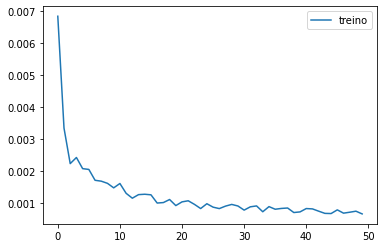

In [28]:
plt.plot(history.history['loss'], label='treino')
plt.legend();

In [29]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(492, 60, 17) (683, 60, 17)


In [30]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(492, 17)
[[2.78078174e+01 1.74696581e+15 6.20841754e+09 ... 6.57774533e+02
  6.83154678e+02 6.08448608e+02]
 [2.80494639e+01 2.33920242e+15 6.21670697e+09 ... 6.56079629e+02
  6.82865455e+02 6.08581479e+02]
 [2.80693029e+01 2.43644492e+15 6.26867528e+09 ... 6.52938934e+02
  6.82729746e+02 6.08663672e+02]
 ...
 [2.98167257e+01 1.71362312e+15 9.34181982e+09 ... 8.31064147e+02
  8.54421220e+02 7.48621474e+02]
 [2.87647740e+01 1.41169240e+15 9.28849650e+09 ... 8.29755678e+02
  8.56183356e+02 7.48531379e+02]
 [2.82763647e+01 9.67945104e+14 9.24306408e+09 ... 8.29158666e+02
  8.57446257e+02 7.49396007e+02]]


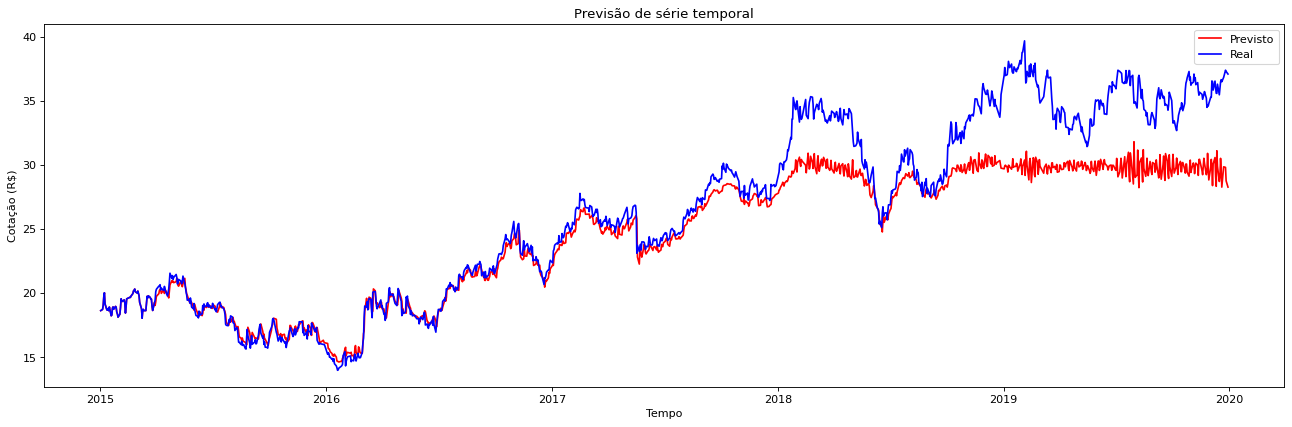

In [31]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [32]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  4.684373686368948


In [33]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  21.94335683354581


In [34]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  11.685060314146742 %


In [35]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  -19.279360047951876
